# Sentiment Analysis

Import packages and import data

In [1]:
import pandas as pd
import nltk
from nltk.tokenize import wordpunct_tokenize
from string import punctuation
from nltk.corpus import stopwords
import re
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('data/sentence_data.csv')

In [3]:
print("Number of sentences in the dataset:", len(data))

Number of sentences in the dataset: 142373


### Pre-processing Data
- Remove punctuation, numbers, stopwords and make lowercase w/out tokenization by word

In [4]:
# setup
sentences = data['article_text']

In [5]:
# lowercase everything
sentences = [sentences.lower() for sentences in sentences]

# remove punctuation
sentences = [s.replace("’s",'') for s in sentences] # remove apostrophe s first
sentences = [re.sub(r'[^\w\s]','',s) for s in sentences]

# remove numbers
sentences = [re.sub('[0-9]','', s) for s in sentences]

# remove double space
sentences = [s.replace("  ",' ') for s in sentences]

# remove stopwords
clean = []
for item in sentences:
    for word in stopwords.words('english'):
        item = item.replace(" " + word + " ", ' ')
    clean.append(item)

data['article_text_clean'] = clean

# tokenize - bag of words
#bag_of_words = []
#for item in clean:
    #item = wordpunct_tokenize(item)
    #bag_of_words.append(item)

In [6]:
print("Pre-cleaned text:", data['article_text'][300] + '\n')
print("Cleaned text:", data['article_text_clean'][300])

Pre-cleaned text:  Biden’s victory in ten out of 14 states that voted on Tuesday put new life into a campaign that was left for dead just weeks before when Sen

Cleaned text:  biden victory ten states voted tuesday put new life campaign left dead weeks sen


### Run sentiment analysis using TextBlob

TextBlob: Simple rule-based API for sentiment analysis
- Uses a sentiment lexicon (consisting of predefined words) to assign scores for each word, which are then averaged out using a weighted average to give an overall sentence sentiment score.
- Return a tuple of form (polarity, subjectivity ) where polarity is a float within the range [-1.0, 1.0] and subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
- Documentation: https://textblob.readthedocs.io/en/dev/quickstart.html

In [7]:
# import packages
from textblob import TextBlob

# setup
text = data['article_text_clean']

In [8]:
score = []
for sentence in text:
    sentence = TextBlob(sentence)
    x = sentence.sentiment
    x = sentence.sentiment.polarity
    score.append(x)

data['score'] = score

# Convert float score to category based on binning to get 5 levels
data['sentiment'] = pd.cut(data['score'],
                    bins=5,
                    labels=[1, 2, 3, 4, 5])
data['sentiment'] = pd.to_numeric(data['sentiment'])
data = data.drop('score', axis=1)

### Check Sentences Qualitatively
- check an examples of sentences in each category
- no way to evaluate other than checking a few randomly within each group

In [9]:
# Extremely negative - 1
AP = data.loc[data['publisher'] == "AP"]
AP_sent = AP[['sentiment', 'article_text']]
AP_sent_1 = AP_sent.loc[data['sentiment'] == 1].reset_index().drop(columns='index')
for item in AP_sent_1['article_text'].sample():
    print("Extremely Negative (1) Example:", item + '\n')
    
# Negative - 2
AP = data.loc[data['publisher'] == "AP"]
AP_sent = AP[['sentiment', 'article_text']]
AP_sent_2 = AP_sent.loc[data['sentiment'] == 2].reset_index().drop(columns='index')
for item in AP_sent_2['article_text'].sample():
    print("Negative (2) Example:", item + '\n')
    
# Neutral - 3
AP = data.loc[data['publisher'] == "AP"]
AP_sent = AP[['sentiment', 'article_text']]
AP_sent_3 = AP_sent.loc[data['sentiment'] == 3].reset_index().drop(columns='index')
for item in AP_sent_3['article_text'].sample():
    print("Neutral (3) Example:", item + '\n')

# Positive - 4
AP = data.loc[data['publisher'] == "AP"]
AP_sent = AP[['sentiment', 'article_text']]
AP_sent_4 = AP_sent.loc[data['sentiment'] == 4].reset_index().drop(columns='index')
for item in AP_sent_4['article_text'].sample():
    print("Positive (4) Example:", item + '\n')

# Extremely positive - 5
AP = data.loc[data['publisher'] == "AP"]
AP_sent = AP[['sentiment', 'article_text']]
AP_sent_5 = AP_sent.loc[data['sentiment'] == 5].reset_index().drop(columns='index')
for item in AP_sent_5['article_text'].sample():
    print("Extremely Positive (5) Example:", item)

Extremely Negative (1) Example:  Chamber of Commerce, asked the Trump administration and Congress on Monday to act rapidly to help companies have access to cash and avert a “potentially devastating” hit to the economy

Negative (2) Example:   Trump said, “I don’t take responsibility at all” for the slow rollout of testing

Neutral (3) Example:  But in the span of 72 hours, two leading moderates dropped out and the party’s establishment wing sprinted into Biden’s camp

Positive (4) Example:   Tuesday marks the first time voters will weigh in on the Democratic contest since it effectively narrowed to a two-person race between Sanders and Biden

Extremely Positive (5) Example:  Four years ago, Trump eked out a win by about 11,000 votes out of more than 4


### Sentiment by Publisher: Averages, Distribution and Examples

In [10]:
# get average sentiment per publisher
publishers = data.groupby('publisher')['sentiment'].mean().reset_index()
print(publishers)

          publisher  sentiment
0                AP   3.122147
1         Breitbart   3.104303
2               Fox   3.108681
3          buzzfeed   3.168522
4               nbc   3.175444
5    new_york_times   3.087643
6          politico   3.100976
7  washington_times   3.069028


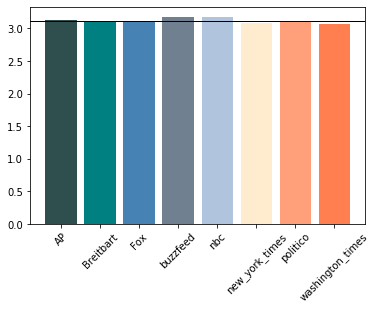

In [11]:
publishers = data.groupby('publisher')['sentiment'].mean().reset_index()

publisher = publishers['publisher']
sentiment = publishers['sentiment']
        
colors = ["darkslategrey", "teal", "steelblue", "slategrey", "lightsteelblue", "blanchedalmond", "lightsalmon", "coral", "tomato", "firebrick"]

plt.bar(publisher, sentiment, color=colors)
plt.xticks(publisher)
plt.xticks(rotation=45)
plt.axhline(y=sentiment.mean(), color='black', linewidth=1) 
plt.show()

In [12]:
# AP sentiment
AP = data.loc[data['publisher'] == "AP"]
AP_sent = AP['sentiment'].sort_values(ascending=True)
# get sentiment counts
AP_sent_count = AP_sent.value_counts().sort_index()
# get percent per sentiment category
AP_1 = AP_sent_count[1]/len(AP_sent)
AP_2 = AP_sent_count[2]/len(AP_sent)
AP_3 = AP_sent_count[3]/len(AP_sent)
AP_4 = AP_sent_count[4]/len(AP_sent)
AP_5 = AP_sent_count[5]/len(AP_sent)

# Breitbart sentiment
Breitbart = data.loc[data['publisher'] == "Breitbart"]
Breitbart_sent = Breitbart['sentiment'].sort_values(ascending=True)
# get sentiment counts
Breitbart_sent_count = Breitbart_sent.value_counts().sort_index()
# get percent per sentiment category
Breitbart_1 = Breitbart_sent_count[1]/len(Breitbart_sent)
Breitbart_2 = Breitbart_sent_count[2]/len(Breitbart_sent)
Breitbart_3 = Breitbart_sent_count[3]/len(Breitbart_sent)
Breitbart_4 = Breitbart_sent_count[4]/len(Breitbart_sent)
Breitbart_5 = Breitbart_sent_count[5]/len(Breitbart_sent)

# Fox sentiment
Fox = data.loc[data['publisher'] == "Fox"]
Fox_sent = Fox['sentiment'].sort_values(ascending=True)
# get sentiment counts
Fox_sent_count = Fox_sent.value_counts().sort_index()
# get percent per sentiment category
Fox_1 = Fox_sent_count[1]/len(Fox_sent)
Fox_2 = Fox_sent_count[2]/len(Fox_sent)
Fox_3 = Fox_sent_count[3]/len(Fox_sent)
Fox_4 = Fox_sent_count[4]/len(Fox_sent)
Fox_5 = Fox_sent_count[5]/len(Fox_sent)

# Buzzfeed sentiment
buzzfeed = data.loc[data['publisher'] == "buzzfeed"]
buzzfeed_sent = buzzfeed['sentiment'].sort_values(ascending=True)
# get sentiment counts
buzzfeed_sent_count = buzzfeed_sent.value_counts().sort_index()
# get percent per sentiment category
buzzfeed_1 = buzzfeed_sent_count[1]/len(buzzfeed_sent)
buzzfeed_2 = buzzfeed_sent_count[2]/len(buzzfeed_sent)
buzzfeed_3 = buzzfeed_sent_count[3]/len(buzzfeed_sent)
buzzfeed_4 = buzzfeed_sent_count[4]/len(buzzfeed_sent)
buzzfeed_5 = buzzfeed_sent_count[5]/len(buzzfeed_sent)

# NBC
nbc = data.loc[data['publisher'] == "nbc"]
nbc_sent = nbc['sentiment'].sort_values(ascending=True)
# get sentiment counts
nbc_sent_count = nbc_sent.value_counts().sort_index()
# get percent per sentiment category
nbc_1 = nbc_sent_count[1]/len(nbc_sent)
nbc_2 = nbc_sent_count[2]/len(nbc_sent)
nbc_3 = nbc_sent_count[3]/len(nbc_sent)
nbc_4 = nbc_sent_count[4]/len(nbc_sent)
nbc_5 = nbc_sent_count[5]/len(nbc_sent)

# New York Times
new_york_times = data.loc[data['publisher'] == "new_york_times"]
new_york_times_sent = new_york_times['sentiment'].sort_values(ascending=True)
# get sentiment counts
new_york_times_sent_count = new_york_times_sent.value_counts().sort_index()
# get percent per sentiment category
new_york_times_1 = new_york_times_sent_count[1]/len(new_york_times_sent)
new_york_times_2 = new_york_times_sent_count[2]/len(new_york_times_sent)
new_york_times_3 = new_york_times_sent_count[3]/len(new_york_times_sent)
new_york_times_4 = new_york_times_sent_count[4]/len(new_york_times_sent)
new_york_times_5 = new_york_times_sent_count[5]/len(new_york_times_sent)

# Politico
politico = data.loc[data['publisher'] == "politico"]
politico_sent = politico['sentiment'].sort_values(ascending=True)
# get sentiment counts
politico_sent_count = politico_sent.value_counts().sort_index()
# get percent per sentiment category
politico_1 = politico_sent_count[1]/len(politico_sent)
politico_2 = politico_sent_count[2]/len(politico_sent)
politico_3 = politico_sent_count[3]/len(politico_sent)
politico_4 = politico_sent_count[4]/len(politico_sent)
politico_5 = politico_sent_count[5]/len(politico_sent)

# Washington Times
washington_times = data.loc[data['publisher'] == "washington_times"]
washington_times_sent = washington_times['sentiment'].sort_values(ascending=True)
# get sentiment counts
washington_times_sent_count = washington_times_sent.value_counts().sort_index()
# get percent per sentiment category
washington_times_1 = washington_times_sent_count[1]/len(washington_times_sent)
washington_times_2 = washington_times_sent_count[2]/len(washington_times_sent)
washington_times_3 = washington_times_sent_count[3]/len(washington_times_sent)
washington_times_4 = washington_times_sent_count[4]/len(washington_times_sent)
washington_times_5 = washington_times_sent_count[5]/len(washington_times_sent)

### Plot sentiment breakdown by publisher
- code from: https://matplotlib.org/3.1.3/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html

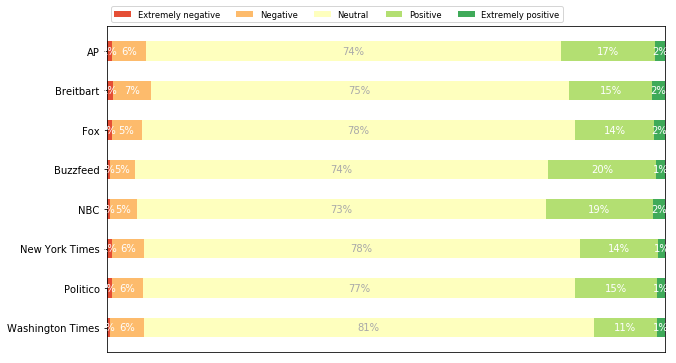

In [13]:
category_names = ['Extremely negative', 'Negative','Neutral', 'Positive', 'Extremely positive']
publishers = {
    'AP': [AP_1, AP_2, AP_3, AP_4, AP_5],
    'Breitbart': [Breitbart_1, Breitbart_2, Breitbart_3, Breitbart_4, Breitbart_5],
    'Fox': [Fox_1, Fox_2, Fox_3, Fox_4, Fox_5],
    'Buzzfeed': [buzzfeed_1, buzzfeed_2, buzzfeed_3, buzzfeed_4, buzzfeed_5],
    'NBC': [nbc_1, nbc_2, nbc_3, nbc_4, nbc_5],
    'New York Times': [new_york_times_1, new_york_times_2, new_york_times_3, new_york_times_4, new_york_times_5],
    'Politico': [politico_1, politico_2, politico_3, politico_4, politico_5],
    'Washington Times': [washington_times_1, washington_times_2, washington_times_3, washington_times_4, washington_times_5]
}

def survey(publishers, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(publishers.keys())
    data = np.array(list(publishers.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str("{0:.0%}".format(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

survey(publishers, category_names)
plt.savefig('sentiment_count.png', bbox_inches='tight')

### Sentiment by Candidate: Averages and representation by publisher

In [14]:
# calculate average sentiment by candidate and per publisher
# total average
sent_mean = data['sentiment'].mean()

#trump
trump = data.loc[data['Trump'] == 1]
trump_sent_mean = trump['sentiment'].mean()
trump_sentiment = trump.groupby('publisher')['sentiment'].mean().reset_index()

#sanders
sanders = data.loc[data['Sanders'] == 1]
sanders_sent_mean = sanders['sentiment'].mean()
sanders_sentiment = sanders.groupby('publisher')['sentiment'].mean().reset_index()

#biden
biden = data.loc[data['Biden'] == 1]
biden_sent_mean = biden['sentiment'].mean()
biden_sentiment = biden.groupby('publisher')['sentiment'].mean().reset_index()

# warren
warren = data.loc[data['Warren'] == 1]
warren_sent_mean = warren['sentiment'].mean()
warren_sentiment = warren.groupby('publisher')['sentiment'].mean().reset_index()

# buttigieg
buttigieg = data.loc[data['Buttigieg'] == 1]
buttigieg_sent_mean = buttigieg['sentiment'].mean()
buttigieg_sentiment = buttigieg.groupby('publisher')['sentiment'].mean().reset_index()

# bloomberg
bloomberg = data.loc[data['Bloomberg'] == 1]
bloomberg_sent_mean = bloomberg['sentiment'].mean()
bloomberg_sentiment = bloomberg.groupby('publisher')['sentiment'].mean().reset_index()

# klobuchar
klobuchar = data.loc[data['Klobuchar'] == 1]
klobuchar_sent_mean = klobuchar['sentiment'].mean()
klobuchar_sentiment = klobuchar.groupby('publisher')['sentiment'].mean().reset_index()

# yang
yang = data.loc[data['Yang'] == 1]
yang_sent_mean = yang['sentiment'].mean()
yang_sentiment = yang.groupby('publisher')['sentiment'].mean().reset_index()

# steyer
steyer = data.loc[data['Steyer'] == 1]
steyer_sent_mean = steyer['sentiment'].mean()
steyer_sentiment = steyer.groupby('publisher')['sentiment'].mean().reset_index()

# gabbard
gabbard = data.loc[data['Gabbard'] == 1]
gabbard_sent_mean = gabbard['sentiment'].mean()
gabbard_sentiment = gabbard.groupby('publisher')['sentiment'].mean().reset_index()

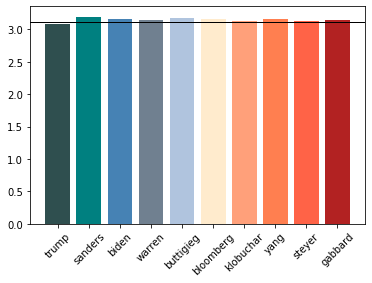

In [15]:
#plot sentiment averages for each candidate
sentiment = [trump_sent_mean, 
             sanders_sent_mean, 
             biden_sent_mean, 
             warren_sent_mean, 
             buttigieg_sent_mean, 
             bloomberg_sent_mean, 
             klobuchar_sent_mean, 
             yang_sent_mean, 
             steyer_sent_mean, 
             gabbard_sent_mean]
candidates = ('trump', 
              'sanders', 
              'biden', 
              'warren', 
              'buttigieg', 
              'bloomberg',
              'klobuchar', 
              'yang', 
              'steyer', 
              'gabbard')

colors = ["darkslategrey", "teal", "steelblue", "slategrey", "lightsteelblue", "blanchedalmond", "lightsalmon", "coral", "tomato", "firebrick"]

plt.bar(candidates, sentiment, color = colors)
plt.xticks(candidates)
plt.xticks(rotation=45)
plt.axhline(y=sent_mean, color='black', linewidth=1) # add line with average of all candidates
plt.show()

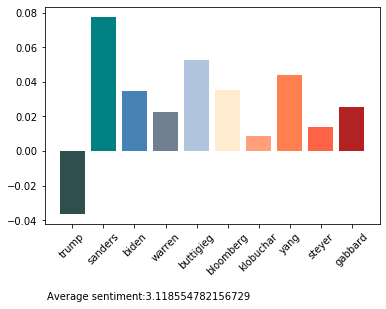

In [33]:
# plot difference in each candidate's sentiment average vs. overall sentiment mean
sentiment = [trump_sent_mean - sent_mean,
             sanders_sent_mean - sent_mean, 
             biden_sent_mean - sent_mean, 
             warren_sent_mean - sent_mean, 
             buttigieg_sent_mean - sent_mean, 
             bloomberg_sent_mean - sent_mean, 
             klobuchar_sent_mean - sent_mean, 
             yang_sent_mean - sent_mean, 
             steyer_sent_mean - sent_mean, 
             gabbard_sent_mean - sent_mean]
candidates = ('trump', 'sanders', 'biden', 'warren', 'buttigieg', 'bloomberg','klobuchar', 'yang', 'steyer', 'gabbard')

colors = ["darkslategrey", "teal", "steelblue", "slategrey", "lightsteelblue", "blanchedalmond", "lightsalmon", "coral", "tomato", "firebrick"]

plt.bar(candidates, sentiment, color=colors)
plt.xticks(candidates)
plt.xticks(rotation=45)

plt.text(x=-0.8, y=-.086, s="Average sentiment:" + str(sent_mean), horizontalalignment='left')

plt.savefig('candidate_sentiment.png', bbox_inches='tight')

### Candidate's sentiment average by outlet

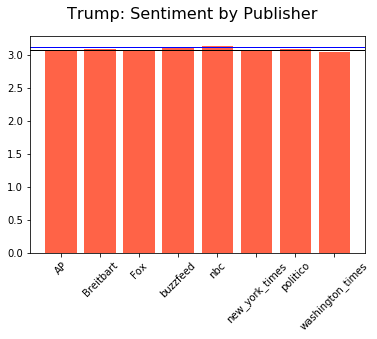

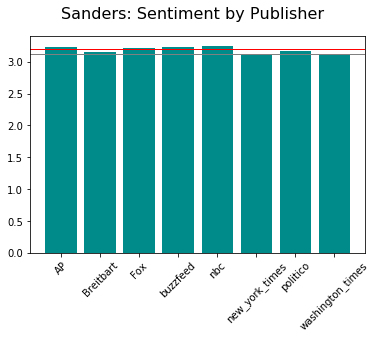

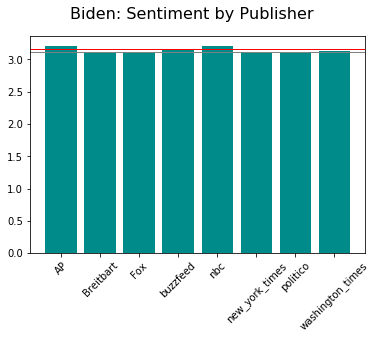

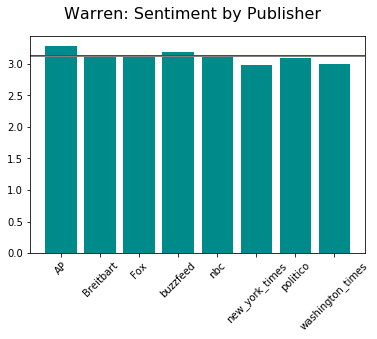

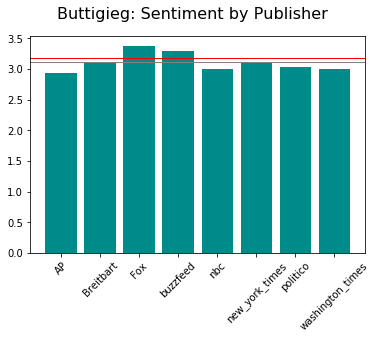

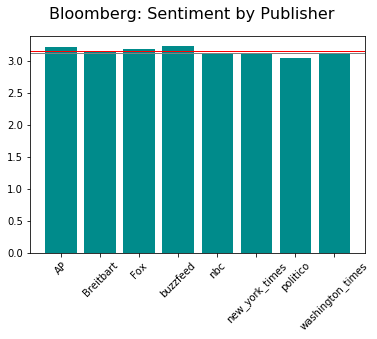

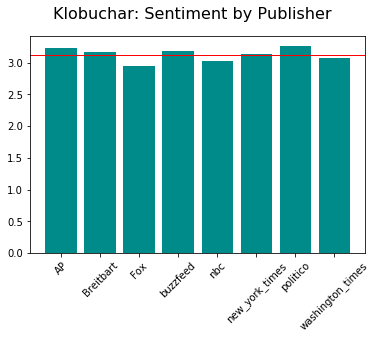

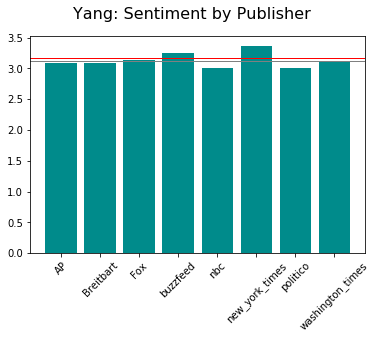

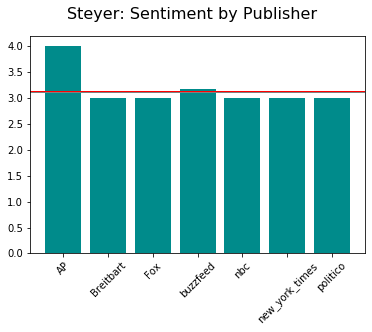

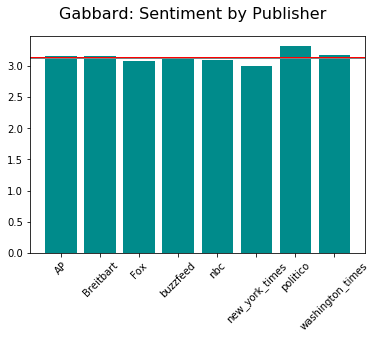

In [17]:
# trump
sentiment = trump_sentiment['sentiment']
outlet = trump_sentiment['publisher']

plt.bar(outlet, sentiment, color = "tomato") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Trump: Sentiment by Publisher', fontsize=16)
plt.axhline(y=sent_mean, color='blue', linewidth=1) # add line with average of all candidates
plt.axhline(y=trump_sent_mean, color='black', linewidth=1) # add line with candidate's average
plt.show()

# sanders
sentiment = sanders_sentiment['sentiment']
outlet = sanders_sentiment['publisher']

plt.bar(outlet, sentiment, color = "darkcyan") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Sanders: Sentiment by Publisher', fontsize=16)
plt.axhline(y=sent_mean, color='grey', linewidth=1) # add line with average of all candidates
plt.axhline(y=sanders_sent_mean, color='red', linewidth=1) # add line with candidate's average
plt.show()

# biden
sentiment = biden_sentiment['sentiment']
outlet = biden_sentiment['publisher']

plt.bar(outlet, sentiment, color = "darkcyan") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Biden: Sentiment by Publisher', fontsize=16)
plt.axhline(y=sent_mean, color='grey', linewidth=1) # add line with average of all candidates
plt.axhline(y=biden_sent_mean, color='red', linewidth=1) # add line with candidate's average
plt.show()

# warren
sentiment = warren_sentiment['sentiment']
outlet = warren_sentiment['publisher']

plt.bar(outlet, sentiment, color = "darkcyan") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Warren: Sentiment by Publisher', fontsize=16)
plt.axhline(y=sent_mean, color='grey', linewidth=1) # add line with average of all candidates
plt.axhline(y=warren_sent_mean, color='red', linewidth=1) # add line with candidate's average
plt.show()

# buttigieg
sentiment = buttigieg_sentiment['sentiment']
outlet = buttigieg_sentiment['publisher']

plt.bar(outlet, sentiment, color = "darkcyan") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Buttigieg: Sentiment by Publisher', fontsize=16)
plt.axhline(y=sent_mean, color='grey', linewidth=1) # add line with average of all candidates
plt.axhline(y=buttigieg_sent_mean, color='red', linewidth=1) # add line with candidate's average
plt.show()

# bloomberg
sentiment = bloomberg_sentiment['sentiment']
outlet = bloomberg_sentiment['publisher']

plt.bar(outlet, sentiment, color = "darkcyan") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Bloomberg: Sentiment by Publisher', fontsize=16)
plt.axhline(y=sent_mean, color='grey', linewidth=1) # add line with average of all candidates
plt.axhline(y=bloomberg_sent_mean, color='red', linewidth=1) # add line with candidate's average
plt.show()

# klobuchar
sentiment = klobuchar_sentiment['sentiment']
outlet = klobuchar_sentiment['publisher']

plt.bar(outlet, sentiment, color = "darkcyan") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Klobuchar: Sentiment by Publisher', fontsize=16)
plt.axhline(y=sent_mean, color='grey', linewidth=1) # add line with average of all candidates
plt.axhline(y=klobuchar_sent_mean, color='red', linewidth=1) # add line with candidate's average
plt.show()

# yang
sentiment = yang_sentiment['sentiment']
outlet = yang_sentiment['publisher']

plt.bar(outlet, sentiment, color = "darkcyan") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Yang: Sentiment by Publisher', fontsize=16)
plt.axhline(y=sent_mean, color='grey', linewidth=1) # add line with average of all candidates
plt.axhline(y=yang_sent_mean, color='red', linewidth=1) # add line with candidate's average
plt.show()

# steyer
sentiment = steyer_sentiment['sentiment']
outlet = steyer_sentiment['publisher']

plt.bar(outlet, sentiment, color = "darkcyan") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Steyer: Sentiment by Publisher', fontsize=16)
plt.axhline(y=sent_mean, color='grey', linewidth=1) # add line with average of all candidates
plt.axhline(y=steyer_sent_mean, color='red', linewidth=1) # add line with candidate's average
plt.show()

# gabbard
sentiment = gabbard_sentiment['sentiment']
outlet = gabbard_sentiment['publisher']

plt.bar(outlet, sentiment, color = "darkcyan") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Gabbard: Sentiment by Publisher', fontsize=16)
plt.axhline(y=sent_mean, color='grey', linewidth=1) # add line with average of all candidates
plt.axhline(y=gabbard_sent_mean, color='red', linewidth=1) # add line with candidate's average
plt.show()

### Difference in candidate's sentiment score to avg. per outlet

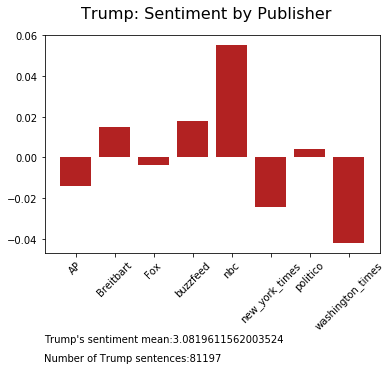

In [18]:
# trump
sentiment = trump_sentiment['sentiment'] - trump_sent_mean
outlet = trump_sentiment['publisher']

plt.bar(outlet, sentiment, color = "firebrick") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Trump: Sentiment by Publisher', fontsize=16)
plt.text(x=-0.8, y=-.091, s="Trump's sentiment mean:" + str(trump_sent_mean), horizontalalignment='left')
plt.text(x=-0.8, y=-.1, s="Number of Trump sentences:" + str(len(trump)), horizontalalignment='left')

plt.savefig('trump.png', bbox_inches='tight')

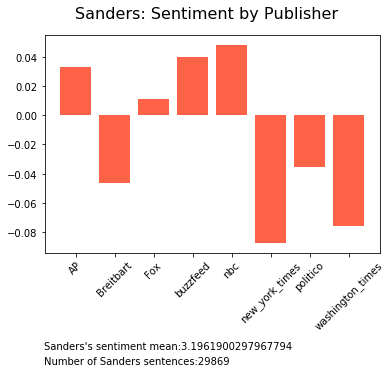

In [19]:
# sanders
sentiment = sanders_sentiment['sentiment'] - sanders_sent_mean
outlet = sanders_sentiment['publisher']

plt.bar(outlet, sentiment, color = "tomato") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Sanders: Sentiment by Publisher', fontsize=16)
plt.text(x=-0.8, y=-.16, s="Sanders's sentiment mean:" + str(sanders_sent_mean), horizontalalignment='left')
plt.text(x=-0.8, y=-.17, s="Number of Sanders sentences:" + str(len(sanders)), horizontalalignment='left')

plt.savefig('sanders.png', bbox_inches='tight')

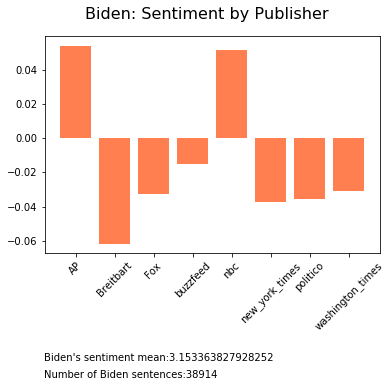

In [20]:
# biden
sentiment = biden_sentiment['sentiment'] - biden_sent_mean
outlet = biden_sentiment['publisher']

plt.bar(outlet, sentiment, color = "coral") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Biden: Sentiment by Publisher', fontsize=16)
plt.text(x=-0.8, y=-.13, s="Biden's sentiment mean:" + str(biden_sent_mean), horizontalalignment='left')
plt.text(x=-0.8, y=-.14, s="Number of Biden sentences:" + str(len(biden)), horizontalalignment='left')

plt.savefig('biden.png', bbox_inches='tight')

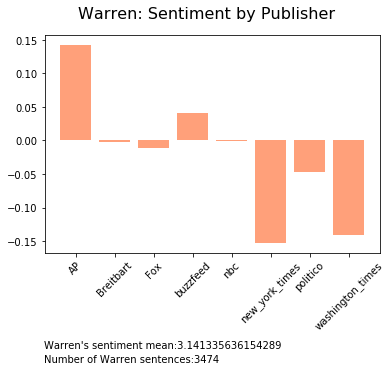

In [21]:
# warren
sentiment = warren_sentiment['sentiment'] - warren_sent_mean 
outlet = warren_sentiment['publisher']

plt.bar(outlet, sentiment, color = "lightsalmon") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Warren: Sentiment by Publisher', fontsize=16)
plt.text(x=-0.8, y=-.31, s="Warren's sentiment mean:" + str(warren_sent_mean), horizontalalignment='left')
plt.text(x=-0.8, y=-.33, s="Number of Warren sentences:" + str(len(warren)), horizontalalignment='left')

plt.savefig('warren.png', bbox_inches='tight')

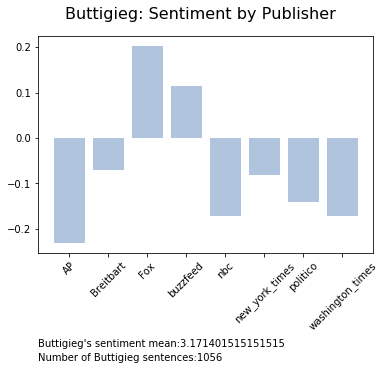

In [22]:
# buttigieg
sentiment = buttigieg_sentiment['sentiment'] - buttigieg_sent_mean
outlet = buttigieg_sentiment['publisher']

plt.bar(outlet, sentiment, color = "lightsteelblue") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Buttigieg: Sentiment by Publisher', fontsize=16)
plt.text(x=-0.8, y=-.46, s="Buttigieg's sentiment mean:" + str(buttigieg_sent_mean), horizontalalignment='left')
plt.text(x=-0.8, y=-.49, s="Number of Buttigieg sentences:" + str(len(buttigieg)), horizontalalignment='left')

plt.savefig('buttigieg.png', bbox_inches='tight')

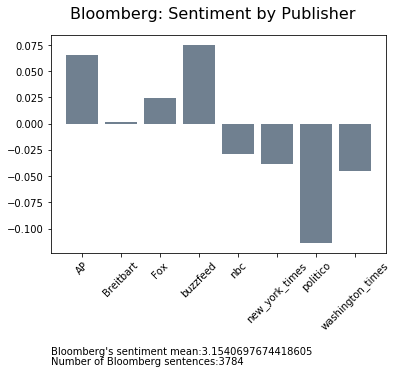

In [23]:
# bloomberg
sentiment = bloomberg_sentiment['sentiment'] - bloomberg_sent_mean 
outlet = bloomberg_sentiment['publisher']

plt.bar(outlet, sentiment, color = "slategrey") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Bloomberg: Sentiment by Publisher', fontsize=16)
plt.text(x=-0.8, y=-.22, s="Bloomberg's sentiment mean:" + str(bloomberg_sent_mean), horizontalalignment='left')
plt.text(x=-0.8, y=-.23, s="Number of Bloomberg sentences:" + str(len(bloomberg)), horizontalalignment='left')

plt.savefig('bloomberg.png', bbox_inches='tight')

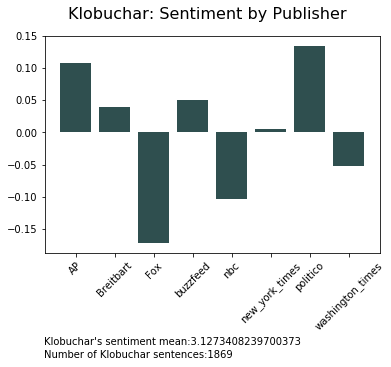

In [24]:
# klobuchar
sentiment = klobuchar_sentiment['sentiment'] - klobuchar_sent_mean
outlet = klobuchar_sentiment['publisher']

plt.bar(outlet, sentiment, color = "darkslategrey") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Klobuchar: Sentiment by Publisher', fontsize=16)
plt.text(x=-0.8, y=-.33, s="Klobuchar's sentiment mean:" + str(klobuchar_sent_mean), horizontalalignment='left')
plt.text(x=-0.8, y=-.35, s="Number of Klobuchar sentences:" + str(len(klobuchar)), horizontalalignment='left')

plt.savefig('klobuchar.png', bbox_inches='tight')

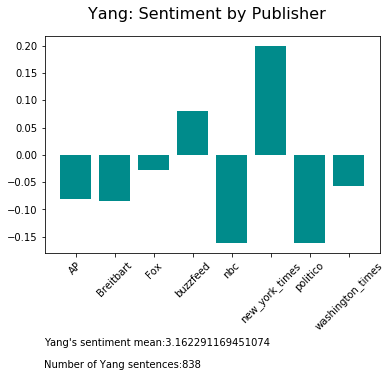

In [25]:
# yang
sentiment = yang_sentiment['sentiment'] - yang_sent_mean
outlet = yang_sentiment['publisher']

plt.bar(outlet, sentiment, color = "darkcyan") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Yang: Sentiment by Publisher', fontsize=16)
plt.text(x=-0.8, y=-.35, s="Yang's sentiment mean:" + str(yang_sent_mean), horizontalalignment='left')
plt.text(x=-0.8, y=-.39, s="Number of Yang sentences:" + str(len(yang)), horizontalalignment='left')

plt.savefig('yang.png', bbox_inches='tight')

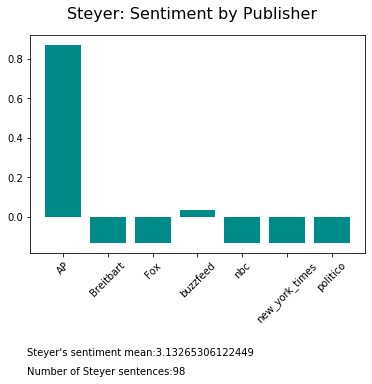

In [26]:
# steyer
sentiment = steyer_sentiment['sentiment'] - steyer_sent_mean
outlet = steyer_sentiment['publisher']

plt.bar(outlet, sentiment, color = "darkcyan") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Steyer: Sentiment by Publisher', fontsize=16)
plt.text(x=-0.8, y=-.7, s="Steyer's sentiment mean:" + str(steyer_sent_mean), horizontalalignment='left')
plt.text(x=-0.8, y=-.8, s="Number of Steyer sentences:" + str(len(steyer)), horizontalalignment='left')

plt.savefig('steyer.png', bbox_inches='tight')

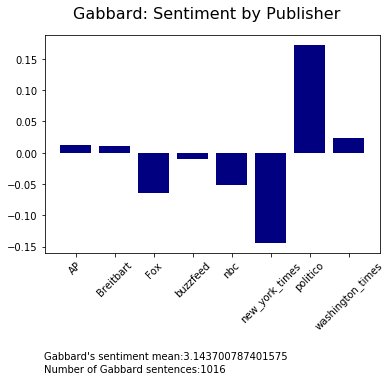

In [27]:
# gabbard
sentiment = gabbard_sentiment['sentiment'] - gabbard_sent_mean
outlet = gabbard_sentiment['publisher']

plt.bar(outlet, sentiment, color = "navy") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Gabbard: Sentiment by Publisher', fontsize=16)
plt.text(x=-0.8, y=-.33, s="Gabbard's sentiment mean:" + str(gabbard_sent_mean), horizontalalignment='left')
plt.text(x=-0.8, y=-.35, s="Number of Gabbard sentences:" + str(len(gabbard)), horizontalalignment='left')

plt.savefig('gabbard.png', bbox_inches='tight')

### Sentiment over time

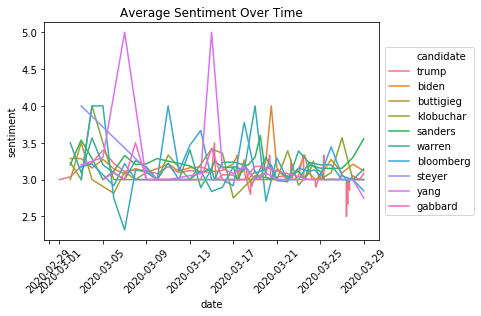

In [28]:
import warnings
warnings.simplefilter(action='ignore')
  
 
# filter sentences only about one candidate
candidate_sentiment = data.loc[data['candidates_mentioned'] == 1]

# create new column with candidate name
candidate_sentiment['candidate'] = candidate_sentiment['article_text'].str.extract('({})'.format('|'.join(candidates)),
                                    flags = re.IGNORECASE, expand = False).str.lower().fillna('')

candidate_sentiment['candidate'] = np.where(candidate_sentiment['article_text'].str.contains('bernie'), 'sanders', candidate_sentiment['candidate'])
    
candidate_sentiment = candidate_sentiment[['date', 'sentiment', 'candidate']]
    
  
    
# make dates consistent and filter for time frame
candidate_sentiment['date'] = pd.to_datetime(candidate_sentiment['date'], errors='coerce')
mask = (candidate_sentiment['date'].astype('str') >= "2020-03-01") & (candidate_sentiment['date'].astype('str') < "2020-03-30")
candidate_sentiment = candidate_sentiment.loc[mask]
 
   
# mean sentiment per day
mean_per_day = candidate_sentiment.groupby(['date', 'candidate']).mean()
   
    
mean_per_day.reset_index(inplace = True)
        
mean_per_day
        
chart = sns.lineplot(x = 'date', y = 'sentiment', hue = 'candidate', data = mean_per_day)
plt.setp(chart.get_xticklabels(), rotation = 45)
plt.setp(chart.get_xticklabels(), rotation = 45)
plt.title('Average Sentiment Over Time')
plt.title('Average Sentiment Over Time')
chart.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)
plt.savefig('sentiment_time.png', bbox_inches='tight')